In [1]:
import os
import MySQLdb
import pandas as pd
import numpy as np
import traceback
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import shutil
from LogClass import LogObj
from ConnMySQLDB import MySQLDB
from Voice_Dectection_Utils import VoiceDetectionUtils

In [2]:
# init
logFile = LogObj('.','logFile')
mySQLDB = MySQLDB(logFile)
utils = VoiceDetectionUtils(logFile)

# Extract Data

In [3]:
#"select * from t_device41 where rec_datetime >= '2019-07-19 20:39:00' and rec_datetime <= '2019-07-19 20:56:00';"
ErrSQL = [
      "select * from t_device41 where rec_datetime >= '2019-07-20 16:31:30' and rec_datetime <= '2019-07-20 16:49:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-21 11:28:30' and rec_datetime <= '2019-07-21 11:40:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-22 22:14:00' and rec_datetime <= '2019-07-22 22:23:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 15:19:00' and rec_datetime <= '2019-07-23 15:28:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 16:23:00' and rec_datetime <= '2019-07-23 17:02:00';"
      #,"select * from t_device41 where rec_datetime >= '2019-07-23 20:38:30' and rec_datetime <= '2019-07-22 20:42:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 22:49:00' and rec_datetime <= '2019-07-23 23:03:30';"
      #,"select * from t_device41 where rec_datetime >= '2019-07-24 03:14:30' and rec_datetime <= '2019-07-24 03:22:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 04:36:00' and rec_datetime <= '2019-07-24 04:38:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 06:39:00' and rec_datetime <= '2019-07-24 06:43:00';"
      #,"select * from t_device41 where rec_datetime >= '2019-07-24 16:37:00' and rec_datetime <= '2019-07-24 17:15:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-25 14:43:30' and rec_datetime <= '2019-07-25 14:48:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-26 16:56:30' and rec_datetime <= '2019-07-26 17:17:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-27 11:50:30' and rec_datetime <= '2019-07-27 12:19:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-28 16:07:30' and rec_datetime <= '2019-07-28 16:25:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-05 16:29:30' and rec_datetime <= '2019-08-05 16:34:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-07 21:28:30' and rec_datetime <= '2019-08-07 21:33:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-07 22:06:30' and rec_datetime <= '2019-08-07 22:16:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-09 02:26:00' and rec_datetime <= '2019-08-09 02:33:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-14 06:05:30' and rec_datetime <= '2019-08-14 06:26:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-14 06:38:30' and rec_datetime <= '2019-08-14 06:46:30';"];

#抓取資料
OutputErrRaw = mySQLDB.extractData('192.168.11.115',3306,'Ac0u5Tasiai2','XY"S/?>wt5K"2','acoustics',ErrSQL)

#轉換資料格式
OutputErrTrans = utils.transRawData(OutputErrRaw)

In [4]:
SQL = ["select * from t_device41 where rec_datetime >= '2019-07-19 21:02:30' and rec_datetime <= '2019-07-19 21:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-19 22:18:30' and rec_datetime <= '2019-07-19 22:32:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-19 22:53:00' and rec_datetime <= '2019-07-19 22:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-21 12:00:00' and rec_datetime <= '2019-07-21 12:09:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-22 22:35:30' and rec_datetime <= '2019-07-22 22:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 17:13:00' and rec_datetime <= '2019-07-23 17:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 03:26:30' and rec_datetime <= '2019-07-24 03:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 04:43:00' and rec_datetime <= '2019-07-24 05:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 17:29:30' and rec_datetime <= '2019-07-24 18:05:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 18:12:00' and rec_datetime <= '2019-07-24 18:28:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-26 17:36:30' and rec_datetime <= '2019-07-26 18:29:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-27 13:07:00' and rec_datetime <= '2019-07-27 13:20:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-28 16:43:00' and rec_datetime <= '2019-07-28 17:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-31 11:21:00' and rec_datetime <= '2019-07-31 12:02:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-07 21:42:00' and rec_datetime <= '2019-08-07 21:59:30';"];

#抓取正常資料
OutputNormalRaw = mySQLDB.extractData('192.168.11.115',3306,'Ac0u5Tasiai2','XY"S/?>wt5K"2','acoustics',SQL)

#轉換資料格式
OutputNormalTrans = utils.transRawData(OutputNormalRaw)

In [11]:
outputErrTransNormal , outputNormalTransNormal = OutputErrTrans, OutputNormalTrans
savePath = './20190911model'
modelDate='20190911'
modelName = modelDate+'normal'
if os.path.isfile(savePath+'/'+modelName+ '.pickle'):
    normal = utils.loadPickleModel(savePath,modelName)
    outputNormalTransNormal = pd.DataFrame(normal.transform(OutputNormalTrans))
    outputErrTransNormal = pd.DataFrame(normal.transform(OutputErrTrans))

outputNormalTransNormal["dataType"] = 0
outputErrTransNormal["dataType"] = 1
outputTotalTrans = outputNormalTransNormal.append(outputErrTransNormal, ignore_index=True)

ok


In [22]:
len(outputErrTransNormal)

37

In [5]:
from sklearn.model_selection import GridSearchCV,learning_curve, validation_curve
import time
import datetime
from sklearn.model_selection import KFold
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [6]:
def print_best_score(gsearch,param_test):
     # 输出best score
    print("Best score: %0.3f" % gsearch.best_score_)
    print("Best parameters set:")
    # 输出最佳的分类器到底使用了怎样的参数
    best_parameters = gsearch.best_estimator_.get_params()
    for param_name in sorted(param_test.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))


In [7]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, xlabel, ylabel, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    print(test_mean)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


def plot_validation_curve(param_range, train_scores, test_scores, title, xlabel, ylabel, alpha=0.1):
    #param_range = [x[1] for x in param_range] 
    #sort_idx = np.argsort(param_range)
    #param_range=np.array(param_range)[sort_idx]
    train_mean = np.mean(train_scores, axis=1)#[sort_idx]
    train_std = np.std(train_scores, axis=1)#[sort_idx]
    test_mean = np.mean(test_scores, axis=1)#[sort_idx]
    test_std = np.std(test_scores, axis=1)#[sort_idx]
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='best')
    plt.show()

## model : ensemble(random forest)

In [10]:
#資料shuffle
outputTotalTrans = outputTotalTrans.sample(frac=1)

In [20]:
from sklearn import ensemble 
forest_param_grid = {'n_estimators': [10,15, 20,25, 30],'max_depth':[1, 2, 3, 4]}


In [21]:
model = ensemble.RandomForestClassifier(random_state = 11, oob_score = True)
kf = KFold(n_splits=5,shuffle=True) #, random_state=40
forest_grid = GridSearchCV(estimator= model, param_grid = forest_param_grid,scoring='f1', cv=kf, verbose=1)

In [22]:
start_time = datetime.datetime.now()
forest_grid.fit(outputTotalTrans.iloc[:, 0:76],outputTotalTrans["dataType"])
end_time=datetime.datetime.now()
print("--- %s seconds ---" % (end_time - start_time))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
--- 0:00:02.222462 seconds ---


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


In [23]:
print_best_score(forest_grid, forest_param_grid)

Best score: 0.910
Best parameters set:
	max_depth: 3
	n_estimators: 15


In [24]:
y_pred = forest_grid.predict(outputTotalTrans.iloc[:, 0:76])
print("accuracy = %.*f" % (3,metrics.accuracy_score(outputTotalTrans["dataType"], y_pred)))

accuracy = 0.993


In [25]:
print(metrics.classification_report(outputTotalTrans["dataType"], y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       100
          1       1.00      0.97      0.99        37

avg / total       0.99      0.99      0.99       137



[0.72989418 0.72989418 0.72989418 0.72989418 0.72989418 0.72989418
 0.72989418 0.83201058 0.94126984]


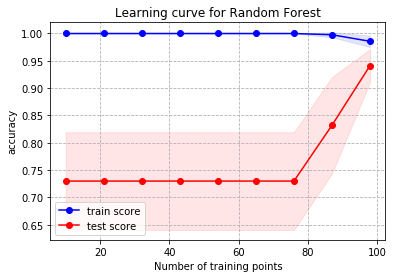

In [26]:
X_train = outputTotalTrans.iloc[:, 0:76]
y_train = outputTotalTrans["dataType"]

train_sizes, train_scores, test_scores = learning_curve(
        estimator=forest_grid.best_estimator_, X=X_train, y=y_train,
        train_sizes=np.arange(0.1, 1.0, 0.1), cv=kf, scoring='accuracy', n_jobs=- 1)

plot_learning_curve(train_sizes, train_scores, test_scores, 'Learning curve for Random Forest', 'Number of training points', 'accuracy')

In [27]:
np.mean(test_scores[-1])

0.9412698412698411

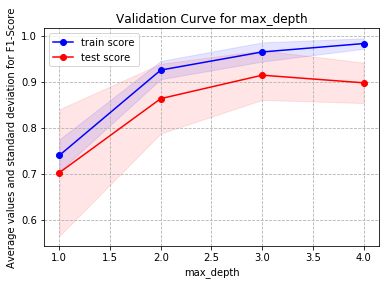

In [28]:
X_train = outputTotalTrans.iloc[:, 0:76]
y_train = outputTotalTrans["dataType"]
forest_param_grid = {'n_estimators': [10,15, 20,25, 30],'max_depth':[1, 2, 3, 4]}

train_scores, test_scores = validation_curve(
    estimator=forest_grid.best_estimator_, X=X_train, y=y_train, param_name="max_depth", param_range=forest_param_grid['max_depth'],
    cv=kf, scoring="f1", n_jobs=-1)

plot_validation_curve(forest_param_grid['max_depth'], train_scores, test_scores, "Validation Curve for max_depth", 'max_depth', 'Average values and standard deviation for F1-Score')


In [147]:
#save model
saveModel('./rf_model', '20190911rf', forest_grid.best_estimator_)

## model : svm
- C是惩罚系数，即对误差的宽容度。c越高，说明越不能容忍出现误差,容易过拟合。C越小，容易欠拟合。C过大或过小，泛化能力变差

- gamma是选择RBF函数作为kernel后，该函数自带的一个参数。隐含地决定了数据映射到新的特征空间后的分布，gamma越大，支持向量越少，gamma值越小，支持向量越多。支持向量的个数影响训练与预测的速度。

In [29]:
#資料shuffle
outputTotalTrans = outputTotalTrans.sample(frac=1)

In [45]:
from sklearn.svm import SVC
svc_param_grid = { 'C':  [1, 1.2, 1.4,1.6,1.8,2.0], 'gamma': [0.00001,0.00003,0.00005, 0.00007],'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] }

In [46]:
lsvc = SVC(probability=True)
kf = KFold(n_splits=5,shuffle=True, random_state=43)
svc_grid = GridSearchCV(estimator= lsvc, param_grid = svc_param_grid,scoring='f1', cv=kf, verbose=1)

In [47]:
start_time = datetime.datetime.now()
svc_grid.fit(outputTotalTrans.iloc[:, 0:76],outputTotalTrans["dataType"])
end_time=datetime.datetime.now()
print("--- %s seconds ---" % (end_time - start_time))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
--- 0:00:02.598735 seconds ---


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    2.5s finished


In [48]:
print_best_score(svc_grid, svc_param_grid)

Best score: 0.953
Best parameters set:
	C: 1.8
	gamma: 1e-05
	kernel: 'linear'


In [53]:
y_pred = svc_grid.predict(outputTotalTrans.iloc[:, 0:76])
print("accuracy = %.*f" % (3,metrics.accuracy_score(outputTotalTrans["dataType"], y_pred)))

accuracy = 1.000


[0.89100529 0.88359788 0.89153439 0.92037037 0.94206349 0.91269841
 0.94920635 0.96375661 0.95634921]


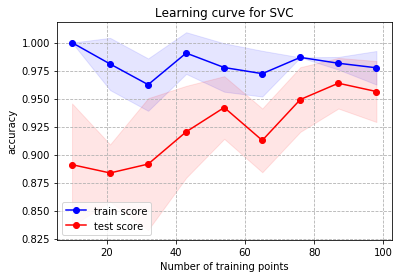

In [49]:
X_train = outputTotalTrans.iloc[:, 0:76]
y_train = outputTotalTrans["dataType"]

train_sizes, train_scores, test_scores = learning_curve(
        estimator=svc_grid.best_estimator_, X=X_train, y=y_train,
        train_sizes=np.arange(0.1, 1.0, 0.1), cv=kf, scoring='accuracy')

plot_learning_curve(train_sizes, train_scores, test_scores, 'Learning curve for SVC', 'Number of training points', 'accuracy')

In [50]:
np.mean(test_scores[-1])

0.9563492063492063

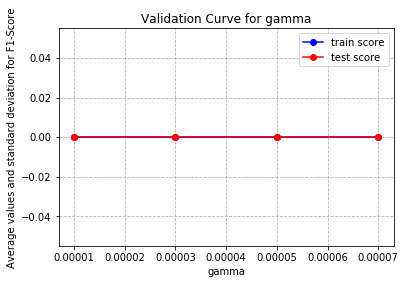

In [52]:
X_train = outputTotalTrans.iloc[:, 0:76]
y_train = outputTotalTrans["dataType"]
svc_param_grid = { 'C':  [1, 1.2, 1.4,1.6,1.8,2.0], 'gamma': [0.00001,0.00003,0.00005, 0.00007],'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] }

train_scores, test_scores = validation_curve(
    estimator=svc_grid.best_estimator_, X=X_train, y=y_train, param_name="C", param_range=svc_param_grid['gamma'],
    cv=kf, scoring="f1", n_jobs=-1)

plot_validation_curve(svc_param_grid['gamma'], train_scores, test_scores, "Validation Curve for gamma", 'gamma', 'Average values and standard deviation for F1-Score')


In [168]:
#save model
saveModel('./svm_model', '20190911svm', svc_grid.best_estimator_)

## model : XGBOOST

In [54]:
#資料shuffle
outputTotalTrans = outputTotalTrans.sample(frac=1)

In [55]:
import xgboost as xgb
xgb_param_grid = {'n_estimators':[10,15, 20,25, 30]
                  ,'max_depth':[2,3,4],'gamma': [0.0005, 0.001], 'subsample': [1]}
other_params = {}

In [56]:
xgb_inst= xgb.XGBClassifier(**other_params)
kf = KFold(n_splits=5,shuffle=True)
xgb_grid = GridSearchCV(estimator= xgb_inst, param_grid = xgb_param_grid,scoring='accuracy', cv=kf, verbose=1)

In [57]:
start_time = datetime.datetime.now()
xgb_grid.fit(outputTotalTrans.iloc[:, 0:76],outputTotalTrans["dataType"])
end_time=datetime.datetime.now()
print("--- %s seconds ---" % (end_time - start_time))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
--- 0:00:02.709593 seconds ---


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.6s finished


In [58]:
print_best_score(xgb_grid, xgb_param_grid)

Best score: 0.934
Best parameters set:
	gamma: 0.0005
	max_depth: 2
	n_estimators: 30
	subsample: 1


In [62]:
y_pred = xgb_grid.predict(outputTotalTrans.iloc[:, 0:76])
print("accuracy = %.*f" % (3,metrics.accuracy_score(outputTotalTrans["dataType"], y_pred)))

accuracy = 0.993


[0.8468254  0.86243386 0.86137566 0.87619048 0.88280423 0.8973545
 0.89761905 0.92724868 0.91931217]


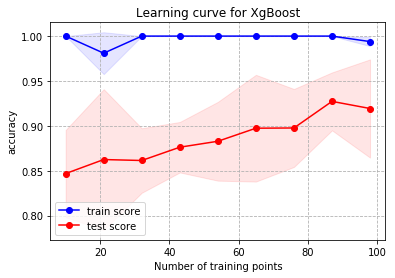

In [59]:
X_train = outputTotalTrans.iloc[:, 0:76]
y_train = outputTotalTrans["dataType"]

train_sizes, train_scores, test_scores = learning_curve(
        estimator=xgb_grid.best_estimator_, X=X_train, y=y_train,
        train_sizes=np.arange(0.1, 1.0, 0.1), cv=kf, scoring='accuracy')

plot_learning_curve(train_sizes, train_scores, test_scores, 'Learning curve for XgBoost', 'Number of training points', 'accuracy')

In [60]:
np.mean(test_scores[-1])

0.9193121693121693

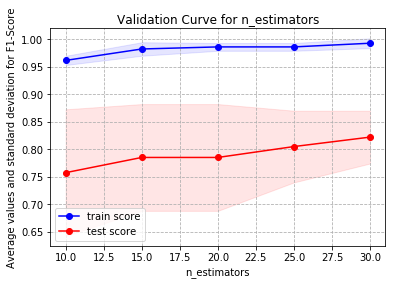

In [61]:
X_train = outputTotalTrans.iloc[:, 0:76]
y_train = outputTotalTrans["dataType"]
xgb_param_grid = {'n_estimators':[10,15, 20,25, 30]
                  ,'max_depth':[2,3,4],'gamma': [0.0005, 0.001], 'subsample': [1]}

train_scores, test_scores = validation_curve(
    estimator=xgb_grid.best_estimator_, X=X_train, y=y_train, param_name="n_estimators", param_range=xgb_param_grid['n_estimators'],
    cv=kf, scoring="f1", n_jobs=-1)

plot_validation_curve(xgb_param_grid['n_estimators'], train_scores, test_scores, "Validation Curve for n_estimators", 'n_estimators', 'Average values and standard deviation for F1-Score')


In [48]:
#save model
savePath = './20190911model'
utils.savePickleModel(savePath, '20190917xgb', xgb_grid.best_estimator_)

## 測試投票

In [179]:
#資料shuffle
outputTotalTrans = outputTotalTrans.sample(frac=1)


In [180]:
resultList = []

rf = loadModel('./rf_model', '20190911rf.pickle')
y_pred = rf.predict(outputTotalTrans.iloc[:, 0:76])
resultList.append(y_pred)

svm = loadModel('./svm_model', '20190911svm.pickle')
y_pred = svm.predict(outputTotalTrans.iloc[:, 0:76])
resultList.append(y_pred)

xgb = loadModel('./xgb_model', '20190911xgb.pickle')
y_pred = xgb.predict(outputTotalTrans.iloc[:, 0:76])
resultList.append(y_pred)

import numpy as np
resultList = np.sum(resultList,axis=0) > len(resultList)*0.5
y_pred = resultList*1

print("accuracy = %.*f" % (3,metrics.accuracy_score(outputTotalTrans["dataType"], y_pred)))

accuracy = 0.993
